In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy

# 第２章 推薦システムをつくる

## 協調フィルタリング

### ユーザーベース協調フィルタリングの実装



過去のユーザーがどのアイテムにどのような評価をしたかというデータを用いる手法。

データ上で、ユーザーがN人、アイテムがM個存在するとき

\begin{align}
ユーザー:u_1, u_2, \cdots u_N \\
アイテム:v_1, v_2, \cdots v_M \\
ユーザーu_iがアイテムv_jにつけた評価:r_{i,j} \\
評価しなかった場合:r_{i,j} = 0
\end{align}

と表現するようにします。（何故か右よりになる・・・？あと最後にでる縦線なに？）


このデータから「あなたと同じ商品を買っている人はこんな商品も買っています」を実現するためにはユーザー同士が「どれくらい同じ商品を買っているか」を表す類似度を求める必要があります。

こんな感じでユーザー同士の近さからアイテムを推薦する協調フィルタリングを**ユーザーベース協調フィルタリング**と呼びます。


$u_i$と$u_j$の類似度を$sim_{i,j}$とします。このとき評価しなかった場合$r_{i,j}$に類似したユーザーから求める評価値$\hat{r_{i,k}}$は次のようにして求めます。

\begin{align}
\hat{r_{i,k}} = \sum^N_{i=0}sim_{i,j} \cdot r_{j,k}
\end{align}


なるほど。わからん（｀・ω・）=3


### 学校で赤点とってた俺に向けての数式の内訳（？）

#### $\sum^N_{i=0}$について
$\sum^N_{i=0}x_n$は$x_1 + x_2 + \cdots + x_N$と同じ。下段（i=0）から上段（N)まで全部足せばいい（総和）
  
なので、$i$が増える度に、$sim_{i,j} \cdot r_{j,k}$に当て込めて計算していけばおｋ（$j$と$k$が何になるのかは知らね）  
  
#### $x_i$ 、 $x_{i,j}$について
$a = (10, 9, 8, 7, 6)$という数値があった場合、配列の要素を総称的に$a_1 = 10$みたいな表現ができる  
$a_1 = 10, a_2 = 9, a_3 = 8\dots a_5 = 6$
  
２つの値がカンマ区切りってじゃーなんなの？  
２次元らしい。numpyで説明

In [6]:
# 4 x 4の行列
a = numpy.array([[1, 2, 3, 4],[5,6,7,8],[9,10,11,12],[13,14,15,16]])
a

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12],
       [13, 14, 15, 16]])

$a_{1,1} = 1,a_{1,2} = 2, a_{1,3} = 3, a_{1,4} = 4, a_{2,1} = 5 \dots a_{4,4} = 16$ こんな感じ

#### $\cdot$について
中点（$ \cdot $）は乗算です。

また今回あんまり関係ないが、最近の俺の悩みだった$\prod_{i=0}^n x_i$<=**厳島神社**みたいな記号は総乗の意味らしい。

#### $\hat{r_{i,k}}$について

母数の推定量（^）らしい。ようわからん

#### $\hat{r_{i,k}} = \sum^N_{i=0}sim_{i,j} \cdot r_{j,k}$の式のまとめ

なんか値をあてこめていって、総和したら推定量がわかりますお！（^ω^

**話を戻します。**
この値が高いほど「あなたと同じ商品を買っている人はこんな商品も買っています」に表示するアイテムとなります。（本当かよ。。。）

この式の意味するところは、自分と商品の購買傾向が似ている人がその商品にどのような評価をしているかということであり、たくさん同じ商品を買っている人が高い評価をしているほど、大きな値になります。

ではこの$sim_{i,j}$はどのように求めているのでしょうか。ここではそれぞれのユーザー$u_i,u_j$をベクトルの空間上の点として表現し、２点間の指標を類似度とします。これは協調フィルタリングだけでなくデータマイニング技術全般に用いられる方法です。例えば文章韓の類似度を測る場合には文章に出現する単語をそれぞれ次元として文章をベクトル表現します。

ユーザーをベクトル表現する場合にはアイテムを次元評価値を各次元の値として次のように表現します。

\begin{align}
\vec{u_i} = (r_{i,1},r_{i,2},\dots,r_{i,M})^T
\end{align}

ユーザーがアイテムをつけた評価値を行列して次のように表せる

\begin{align}
[\vec{u_1},\dots,\vec{u_N}]
\end{align}

このような行列をユーザーアイテム行列と呼ぶ。

このベクトルから類似度を求める。代表的な２つだけ説明する。

##### コサイン距離

\begin{align}
cosine(\vec{u_i},\vec{u_j}) = \dfrac{\vec{u_i}\cdot\vec{u_j}}{|\vec{u_i}||\vec{u_j}|}
\end{align}

※$|u_i|$は絶対値の記号

ベクトル間のコサイン値を距離として扱う手法であり、ベクトル空間上の角度のコサイン値に対応します。コサイン値のため取り得る値は0.0〜1.0になる。

距離が近くなるほど値は小さくなるので$1.0 - consine$として求めます。

##### ジャカード係数

\begin{align}
Jaccard(A,B) = \dfrac{A \cap B}{A \cup B}
\end{align}

なるほど（｀・ω・）（わからんぞ！）

ベクトルの各要素が0、1の２値で構成される場合、それぞれのベクトルは集合として考えることができます。推薦システムにおいては商品を購入したか否かを0、1で表すような場合に用いることができる。

それぞれをベクトル演算に適用すると以下になる

\begin{align}
A = \vec{u_i}\\\
B = \vec{u_j}\\\
Jaccard(\vec{u_i},\vec{u_j}) = \dfrac{\vec{u_i} \cdot \vec{u_j}}{\vec{|u_i|} + \vec{|u_j|} - \vec{u_i} \cdot \vec{u_j}}
\end{align}

（そろそろ例がほしいな！）

協調フィルタリングの流れとして

1. ユーザーの評価データをベクトル表現
2. ユーザー間の類似度を求める
3. それを元にユーザーが評価していないアイテムの評価値を決定する

### アイテムベース協調フィルタリングの実装

「この商品を買った人はこんな商品も買っています」を実現する方法について。ユーザーベース協調フィルタリングに対し、**アイテムベース協調フィルタリング**と呼ばれる手法。

ベクトル表現にしたユーザーの評価データからアイテム同士の類似度を求めて、類似度の高いアイテムを推薦します。

ユーザー同士の類似度を表現するために、ユーザーをベクトル表現したように、アイテム同士の類似度を表現するためにアイテムをベクトル表現します。

\begin{align}
\vec{v_i} = (r_{1,i},r_{2,i},\cdots,r_{N,i})^T
\end{align}

例えば、ECサイトがある場合、あるアイテムのページに訪問した際に、そのアイテムと類似どの高いアイテムが「この商品を買った人はこんな商品も買っています」として表示されるようになる。

アマゾンでITの本ばっかり買っているとITの本ばかりになる。

<img src="./スクリーンショット 2016-03-06 18.00.56.png">


# **（^ω^；（あれ？！）**

サンプルのコードがあるので、それを読みながら説明する



In [7]:
import item_base_recommend # P141のサンプルコード Pythonによるアイテムの評価値計算

In [8]:
# 評価値行列の例
# 行がユーザー、列がアイテム
R = numpy.array([
  [5, 3, 0, 0], # u0のi0の評価は5、u1のi0の評価は3
  [4, 0, 4, 1],
  [1, 1, 0, 5],
  [0, 0, 4, 4],
  [0, 1, 5, 4]
])

In [9]:
# item_base_recommend.py の中

from scipy.spatial.distance import cosine

def calc_item_score(target_user_index, user_rating_matrix):

  """
  指定したアイテムの評価値を計算する
  :param target_user_index:  int: ユーザーのindex
  :param user_rating_matrix: numpy.ndarray: ユーザーアイテムの評価値行列
  :return:  float: 指定したアイテムの評価値
  """

  target_user_ratings = user_rating_matrix[target_user_index]
  item_similarity = numpy.zeros(len(target_user_ratings))
  for compare_user_index in range(len(user_rating_matrix)):
    compare_user_ratings = user_rating_matrix[compare_user_index]
    if compare_user_index == target_user_index:
      # 同一ユーザーのときは類似度計算しない
      continue

    # ユーザーの類似度をコサイン類似度から求める
    user_similarity = 1.0 - cosine(target_user_ratings, compare_user_ratings)

    # 求めたコサイン類似度をそのユーザーの評価値に乗じて足し合わせる
    item_similarity += user_similarity * compare_user_ratings

  return item_similarity

In [10]:
# １行ずつ実行してみる

target_user_index = 0
user_rating_matrix = R[:]

# 指定したアイテムの評価値を取得
target_user_ratings = user_rating_matrix[target_user_index]
target_user_ratings

array([5, 3, 0, 0])

In [11]:
# 長さが4の0ベクトルを作る
item_similarity = numpy.zeros(len(target_user_ratings))
item_similarity

array([ 0.,  0.,  0.,  0.])

In [12]:
# 評価値行列をループさせて類似度を求める
for compare_user_index in range(len(user_rating_matrix)):
    compare_user_ratings = user_rating_matrix[compare_user_index]
    if compare_user_index == target_user_index:
      # 同一ユーザーのときは類似度計算しない
      print(item_similarity)
      continue

    # ユーザーの類似度をコサイン距離（コサイン類似度）から求める
    # 式でいうsim_{i,j}のところですかね
    # target_user_ratings 指定したユーザーの評価値
    # compare_user_ratings 他ユーザーの評価値
    user_similarity = 1.0 - cosine(target_user_ratings, compare_user_ratings)
    
    '''
    どうして１を引くのか。ソースみたらこんなだった。
        u = _validate_vector(u) # u => target_user_ratings
        v = _validate_vector(v) # v => compare_user_ratings
        dist = 1.0 - np.dot(u, v) / (norm(u) * norm(v))
        return dist
    
    np.dot(u, v) / (norm(u) * norm(v)) <-この式の結果が1に近いなら類似度が近い
    なので、cosine()の結果が0に近いほど類似度が高い。
    これを値が大きいほうに変えるため、結果で１を引けば良い（ややこしい！）
    '''

    # 求めたコサイン類似度をそのユーザーの評価値に乗じて足し合わせる
    # Σのところじゃないかなー。ですよねー？（・ω・）
    item_similarity += user_similarity * compare_user_ratings
    print(item_similarity)

[ 0.  0.  0.  0.]
[ 2.38832574  0.          2.38832574  0.59708143]
[ 2.65236508  0.26403934  2.38832574  1.91727816]
[ 2.65236508  0.26403934  2.38832574  1.91727816]
[ 2.65236508  0.34342776  2.78526783  2.23483183]


さっきの式と照らし合わせると


##### $\hat{r_{i,k}} = \sum^N_{i=0}sim_{i,j} \cdot r_{j,k}$

* $sim_{i,j}$ が `user_similarity = 1.0 - cosine(target_user_ratings, compare_user_ratings)`
* $sim_{i,j} \cdot r_{j,k}$ が `user_similarity * compare_user_ratings`
* $\sum^N_{i=0}$ が、`item_similarity +=`


わかったかも（^ω^ 三 ^ω^)

In [13]:
# 結果
item_similarity

array([ 2.65236508,  0.34342776,  2.78526783,  2.23483183])

・・・（・ω・？

**俺は何を求めていたんだろ...？**

R[0]のユーザーの評価はそれぞれv1 = 5、v2 = 3、v3 = 0、v4 = 0 でした。

つまり本にもあるように、3、４番めのアイテムは評価されていないけど他ユーザーと類似値を求めて予測した。0ではなくなった。

なので、item_similarityの値の中の結果を使ってユーザーに何かしら推薦すれば良い（ってことでいいのかしらー！（」^ω^）」＜合ってるー？）

/Users/kazumatamaki/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/matplotlib/font_manager.py:1282: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


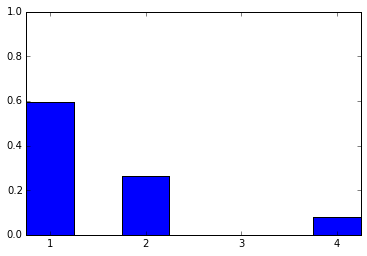

In [14]:
# グラフにしてみた
x = [1, 2, 3, 4]
y = []
for i in range(1,5):
    y.append(1.0 - cosine(R[0], R[i]))
plt.ylim(0,1)
plt.xticks(x, ['1', '2', '3', '4']) 
plt.bar(x, y, align = 'center', width=0.5)
plt.show()

1,2,4の順でユーザーから強く影響を受けているって認識でいい感じだね（多分）

3のユーザーは0と全く違う商品を買っているので類似度が全くないというわけですな。

まだ腑に落ちなかったのでぐぐってみたらところ最高のgifアニメーションが！

イメージしやすい。やっぱり評価されていないところを他ユーザーのデータを使って予測するってのが正しい使い方なんだろうかね。

<img src="http://upload.wikimedia.org/wikipedia/commons/5/52/Collaborative_filtering.gif">

gensimが入っていなかったのでインストール（コンソールからpipを叩く）

`$ pip install gensim`

In [15]:
import content_base_recommend as cbr # P142のサンプルコード 内容ベースフィルタリングのサンプル また、長いので省略

In [16]:
# 映画のサンプルデータ
# 多分１次元が映画で２次元がその映画に出演する俳優ってことでいいのかな？
movies_data = [
  ['actor1', 'actor2', 'actor3'],
  ['actor3', 'actor5', 'actor7'],
  ['actor4', 'actor5', 'actor9'],
  ['actor1', 'actor3', 'actor6'],
  ['actor2', 'actor5', 'actor7'],
  ['actor1', 'actor4', 'actor6'],
  ['actor3', 'actor5', 'actor8'],
  ['actor5', 'actor6', 'actor7'],
  ['actor1', 'actor7', 'actor9'],
  ['actor2', 'actor6', 'actor8'],
]

# ユーザーのプロファイル
# 好きな映画俳優を３つ選べというようなアンケートに答えたような想定

user = ['actor3', 'actor5', 'actor9']

# 実行サンプル
# 好きな映画俳優から「お前はこれが好きなんだろ？」みたいにマッチング度を出す
dictionary, similarityMatrix = cbr.create_similarity_matrix(movies_data, movies_data)
similarity = cbr.calc_similarity(dictionary, similarityMatrix, user)

In [17]:
similarity

[(0, 0.29908097),
 (1, 0.63230097),
 (2, 0.55873668),
 (3, 0.33333331),
 (4, 0.2404678),
 (5, 0.0),
 (6, 0.46990144),
 (7, 0.2723172),
 (8, 0.44970399),
 (9, 0.0)]

In [18]:
# なんどもタイプするの面倒なので関数化（読みやすさ無視。動けばいいのだよ。動けば！）
def cbr_exec(movie_data, user_data):
    import content_base_recommend as cbr
    dictionary, similarityMatrix = cbr.create_similarity_matrix(movie_data, movie_data)
    return cbr.calc_similarity(dictionary, similarityMatrix, user_data)

# データととあるユーザーの結果を照らしあわせて出力
def my_printer(movies_data, user_data, similarity, debug):
    def is_match(actors):
        user_favorite_actors =  set(user_data)
        target_set = set(actors)
        return len(list(user_favorite_actors & target_set)) # set()にすると論理積でマッチした要素が返ってくる。便利！

    for i, j in zip(movies_data, similarity):
        print_str = '好きな俳優が' + str(is_match(i)) + '人出演:\t'
        if debug:
            print_str =   print_str + str(i) + ':' + str(j)
        else:
            print_str = print_str  + str(j)
        print(print_str)

        

In [19]:
# 好きな三人が出演している映画だったら？
# １つは全員、もうひとつは適当にデータをセットして内容ベースフィルタリング
test_movies_data = [['actor3', 'actor5', 'actor9'],['actor4', 'actor5', 'actor9']]
simularity = cbr_exec(test_movies_data, user)

In [20]:
# なんか予想と違う？？？
my_printer(test_movies_data, user, similarity, True)

好きな俳優が3人出演:	['actor3', 'actor5', 'actor9']:(0, 0.29908097)
好きな俳優が2人出演:	['actor4', 'actor5', 'actor9']:(1, 0.63230097)


In [21]:
# 元のサンプルデータに追加するかたちでもっかい実行
movies_data2 = movies_data[:]
movies_data2.append(user)
movies_data2

[['actor1', 'actor2', 'actor3'],
 ['actor3', 'actor5', 'actor7'],
 ['actor4', 'actor5', 'actor9'],
 ['actor1', 'actor3', 'actor6'],
 ['actor2', 'actor5', 'actor7'],
 ['actor1', 'actor4', 'actor6'],
 ['actor3', 'actor5', 'actor8'],
 ['actor5', 'actor6', 'actor7'],
 ['actor1', 'actor7', 'actor9'],
 ['actor2', 'actor6', 'actor8'],
 ['actor3', 'actor5', 'actor9']]

In [22]:
# おっ（^ω^　ええんじゃないでしょうか。
# いっぱいデータを入れればいいんのかな？
simularity = cbr_exec(movies_data2, user)
my_printer(movies_data2, user, simularity, False)

好きな俳優が1人出演:	(0, 0.24933942)
好きな俳優が2人出演:	(1, 0.5675832)
好きな俳優が2人出演:	(2, 0.49387205)
好きな俳優が1人出演:	(3, 0.27867445)
好きな俳優が1人出演:	(4, 0.19944051)
好きな俳優が0人出演:	(5, 0.0)
好きな俳優が2人出演:	(6, 0.4079625)
好きな俳優が1人出演:	(7, 0.22523406)
好きな俳優が1人出演:	(8, 0.38815832)
好きな俳優が0人出演:	(9, 0.0)
好きな俳優が3人出演:	(10, 0.95055318)


In [23]:
# とは言ってもactor + 数字だけじゃ面白く無いので、当然こういう発想は生まれる

my_movies_data = [
    ['デイヴ・ワスカバジ', 'メアリー・ワスカバジ', 'エドワード・ワスカバジ'], # 恐怖！キノコ男
    ['ロン・パリロ,', 'ブランディ・リン・コポック', 'ケビン・マッコーリー'],   # 肉喰植物 キラーツリー
    ['ランス・ヘンリクセン', 'スティーヴ・マラチャック', 'リッキー・ポール・ゴルディン'], # 殺人魚フライングキラー
    ['ランス・ヘンリクセン','シガニー・ウィーバー','ジェイ・ベネディクト'], # エイリアン２
    ['ブライス・ダラス・ハワード','シガニー・ウィーバー','ホアキン・フェニックス'], # ヴィレッジ
    ['ホアキン・フェニックス','ラッセル・クロウ','コニー・ニールセン'], # グラディエーター
    ['マット・マッコイ' , 'ランス・ヘンリクセン' , 'ジェフリー・コムズ'], # ケイブフィアー
    ['ランス・ヘンリクセン','コリン・サーモン','トミー・フラナガン'], # エイリアンvsプレデター
]

# そして好きな俳優はこちら（てーげー）
my_user = [
    'ランス・ヘンリクセン',
    'シガニー・ウィーバー',
    'ホアキン・フェニックス'
]

In [24]:
# 日本語（マルチバイト）でもいけた！
simularity = cbr_exec(my_movies_data, my_user)
my_printer(my_movies_data, my_user, simularity, False)

好きな俳優が0人出演:	(0, 0.0)
好きな俳優が0人出演:	(1, 0.0)
好きな俳優が1人出演:	(2, 0.13245323)
好きな俳優が2人出演:	(3, 0.46291003)
好きな俳優が2人出演:	(4, 0.560112)
好きな俳優が1人出演:	(5, 0.24618298)
好きな俳優が1人出演:	(6, 0.13245323)
好きな俳優が1人出演:	(7, 0.13245323)


In [25]:
t = numpy.array(simularity)
y = t[:, 1]

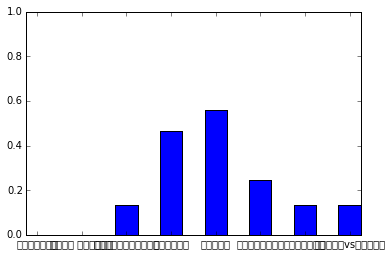

In [26]:
# グラフにしてみる

x = numpy.arange(8)
plt.ylim(0,1)
plt.xticks(x, ['恐怖！キノコ男', '肉喰植物 キラーツリー', '殺人魚フライングキラー', 'エイリアン２', 'ヴィレッジ', 'グラディエーター', 'ケイブフィアー', 'エイリアンvsプレデター']) 
plt.bar(x, y, align = 'center', width=0.5)
plt.show()

In [27]:
# 数を増やしてみる
my_movies_data = [
    ['デイヴ・ワスカバジ', 'メアリー・ワスカバジ', 'エドワード・ワスカバジ', 'ロレッタ・ワスカバジ'], # 恐怖！キノコ男
    ['ロン・パリロ,', 'ブランディ・リン・コポック', 'ケビン・マッコーリー', 'ブライアン・リード'],   # 肉喰植物 キラーツリー
    ['ランス・ヘンリクセン', 'スティーヴ・マラチャック', 'リッキー・ポール・ゴルディン', 'アン・ポラック'], # 殺人魚フライングキラー
    ['ランス・ヘンリクセン','シガニー・ウィーバー','ジェイ・ベネディクト', 'クリストファー・ヘン'], # エイリアン２
    ['ブライス・ダラス・ハワード','シガニー・ウィーバー','ホアキン・フェニックス', 'ウィリアム・ハート'], # ヴィレッジ
    ['ホアキン・フェニックス','ラッセル・クロウ','コニー・ニールセン', 'トーマス・アラナ'], # グラディエーター
    ['マット・マッコイ' , 'ランス・ヘンリクセン' , 'ジェフリー・コムズ', 'ハーレイ・ジョエル'], # ケイブフィアー
    ['ランス・ヘンリクセン','コリン・サーモン','トミー・フラナガン', 'ジョセフ・ライ'], # エイリアンvsプレデター
]

# そして好きな俳優はさっきと同じ
my_user = [
    'ランス・ヘンリクセン',
    'シガニー・ウィーバー',
    'ホアキン・フェニックス'
]

In [28]:
# 数を増やしてもイケル。でも値は小さくなっている
simularity = cbr_exec(my_movies_data, my_user)
my_printer(my_movies_data, my_user, simularity, False)

好きな俳優が0人出演:	(0, 0.0)
好きな俳優が0人出演:	(1, 0.0)
好きな俳優が1人出演:	(2, 0.10910895)
好きな俳優が2人出演:	(3, 0.36115754)
好きな俳優が2人出演:	(4, 0.45291081)
好きな俳優が1人出演:	(5, 0.20739034)
好きな俳優が1人出演:	(6, 0.10910895)
好きな俳優が1人出演:	(7, 0.10910895)


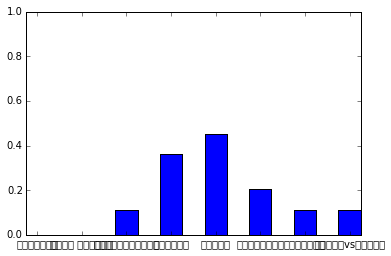

In [29]:
t = numpy.array(simularity)
y = t[:, 1]

# グラフにしてみる

x = numpy.arange(8)
plt.ylim(0,1)
plt.xticks(x, ['恐怖！キノコ男', '肉喰植物 キラーツリー', '殺人魚フライングキラー', 'エイリアン２', 'ヴィレッジ', 'グラディエーター', 'ケイブフィアー', 'エイリアンvsプレデター']) 
plt.bar(x, y, align = 'center', width=0.5)
plt.show()